# Iris Flower Classification

## Codsoft task 3


[Dataset can be found here!](https://www.kaggle.com/datasets/arshid/iris-flower-dataset/)

## Library Imports

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



## Reading the Data

In [4]:
data = pd.read_csv("/content/IRIS.csv")

## EDA (Exploratory data analysis)

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Preprocessing and Cleaning

In [10]:
# Checking for missing values

data.isna().values.any()


False

In [11]:
data.duplicated().values.any()

True

In [12]:
# Dropping the duplicates

data.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
  data.shape

(150, 5)

In [14]:
print(f"Rows in the dataset: {data.shape[0]}")
print(f"Columns in the dataset: {data.shape[1]}")

Rows in the dataset: 150
Columns in the dataset: 5


## Data Visualisation

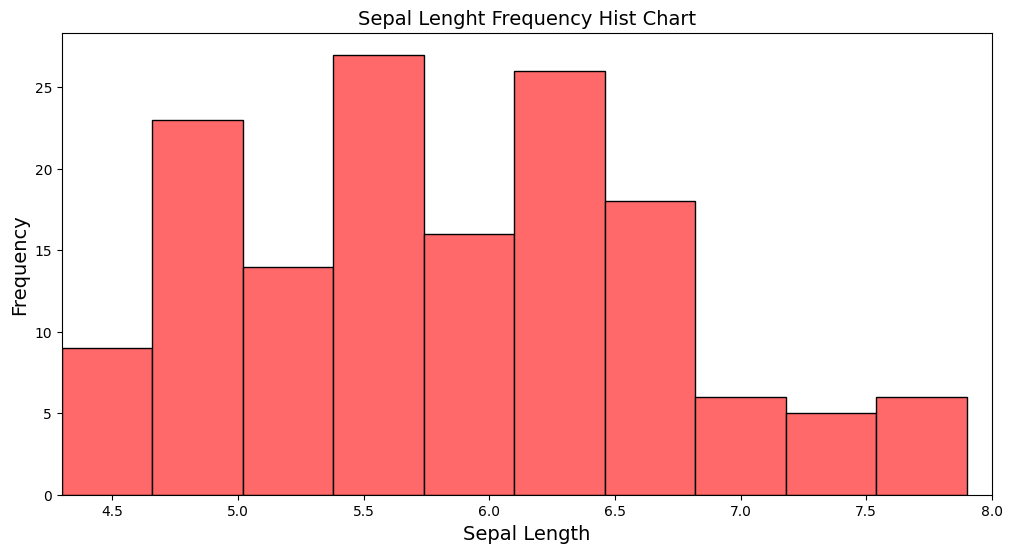

In [15]:
plt.figure(figsize=(12,6))

plt.hist(data.sepal_length, ec='black', color="#FF6969")
plt.xlabel("Sepal Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Sepal Lenght Frequency Hist Chart", fontsize=14)
plt.xlim((4.3, 8))
plt.show()

Text(0.5, 1.0, 'Speal Width Scatter plot')

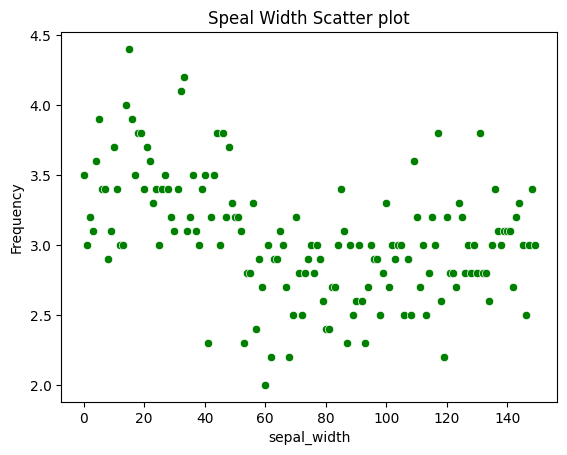

In [16]:
sns.scatterplot(data.sepal_width, c="green")
plt.xlabel("sepal_width")
plt.ylabel("Frequency")
plt.title("Speal Width Scatter plot")

Text(0.5, 1.0, 'Speal Width Scatter plot')

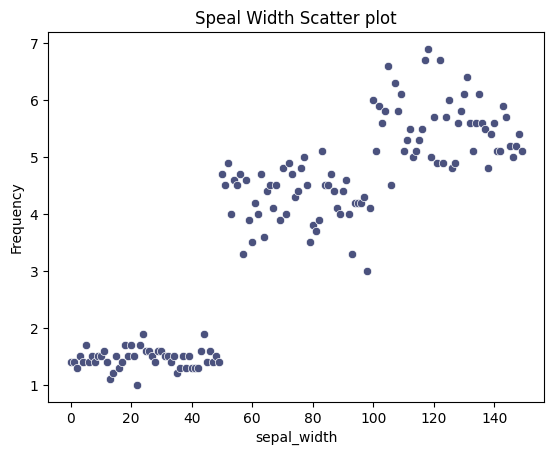

In [17]:
sns.scatterplot(data.petal_length, c="#4B527E")
plt.xlabel("sepal_width")
plt.ylabel("Frequency")
plt.title("Speal Width Scatter plot")

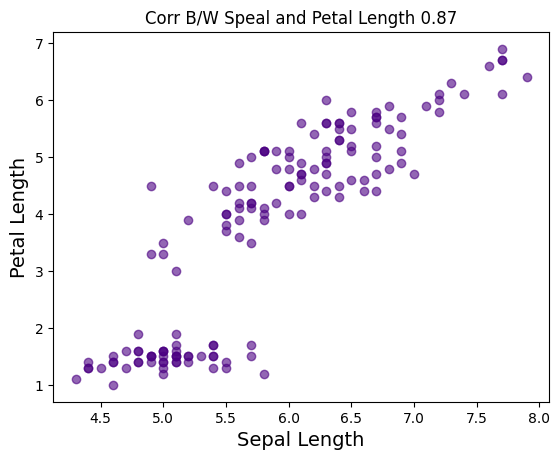

In [21]:
plt.scatter(data.sepal_length, data.petal_length, alpha=0.6, color="indigo")
plt.xlabel("Sepal Length", fontsize=14)
plt.ylabel("Petal Length", fontsize=14)
plt.title(f"Corr B/W Speal and Petal Length {data.sepal_length.corr(data.petal_length):.2f}")
plt.show()

In [19]:
corr = data.corr()

<ipython-input-19-17182710d970>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


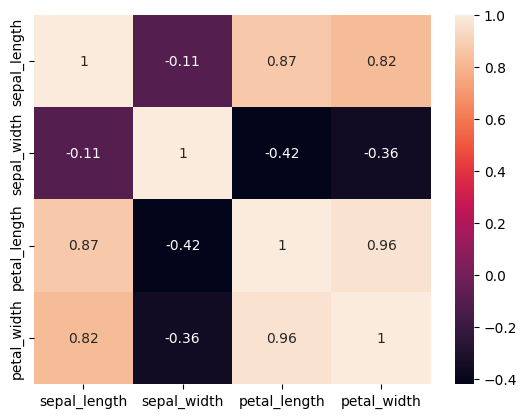

In [20]:
ax = sns.heatmap(corr, annot=True)

## Model Creation

### Train-Test-Split


In [26]:
X = data.drop(columns='species')
y = data.species


# 80% Training and 20% for testing size split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Pre-Processing

In [28]:
le = LabelEncoder()

#encoding the string values for species
y_encoded = le.fit_transform(y)

#Transforming attributes to the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = knn.predict(X_test)


Accuracy: 96.67%


## Model Metrics and Evaluation

In [33]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 96.67%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



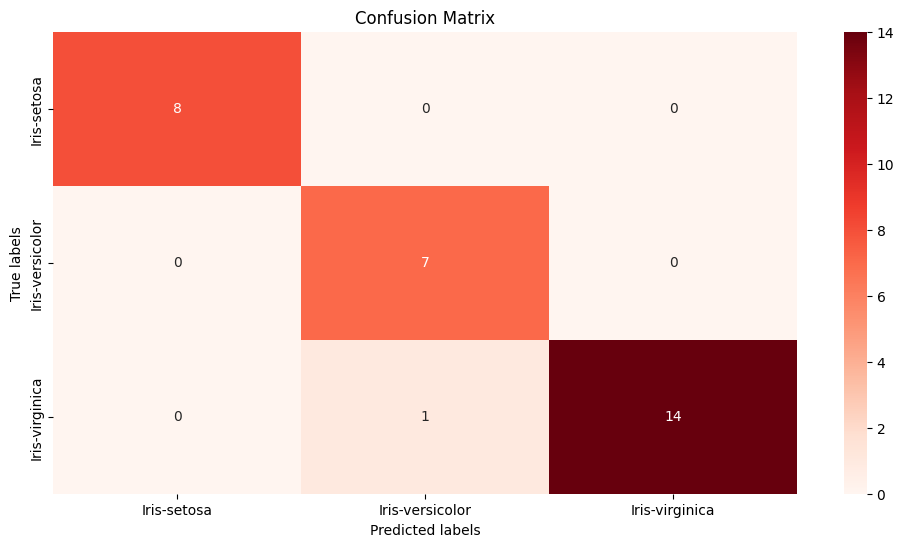

In [37]:
# Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()